<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/2_RegresionMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Redes Neuronales MLP para Regresión**

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
from tensorflow import keras

##**Datos**

- Predicción de precios de casas (distritos California)
- Sólo datos numéricos y sin valores faltantes



In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

Separación en entrenamiento, validación y pruebas

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

Escala de variables

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # recordar que la escala se calcula sobre el conjunto de entrenamiento
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

##**Construcción del Modelo**

- Muy similar al modelo de clasificación.
- La diferencia es que solo hay una neurona en la capa de salida y no se aplica ninguna función de activación.
- También la función de costo es ``mean_squared_error``


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                270       
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.6952 - val_loss: 1.9360
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8874 - val_loss: 1.1455
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7493 - val_loss: 0.8340
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6834 - val_loss: 0.7102
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6389 - val_loss: 0.6237
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6034 - val_loss: 0.5736
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5751 - val_loss: 0.5363
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5516 - val_loss: 0.5107
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - val_loss: 0.4920
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5158 - val_loss: 0.4768

In [ ]:
mse_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.4433


In [ ]:
mse_test

0.4432816803455353

In [ ]:
X_new = X_test[:3] # nuevos ejemplos

In [ ]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 131ms/step


In [ ]:
y_pred

array([[0.6126014],
       [1.6643739],
       [3.291143 ]], dtype=float32)

**Visualización**

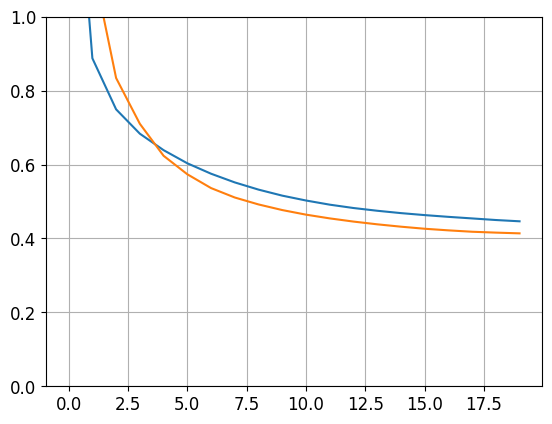

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#**Functional API (Redes complejas)**

- Un ejemplo de una red neuronal no secuencial es una red neuronal amplia y profunda (wide and deep).
-  Esta arquitectura hace posible que la red neuronal aprenda tanto
patrones profundos (usando el camino profundo) y reglas simples (a través del camino corto). En contraste, una MLP normal obliga a que todos los datos fluyan a través de la pila completa de capas, por lo que
Los patrones simples pueden ser distorsionados por esta secuencia de transformaciones.


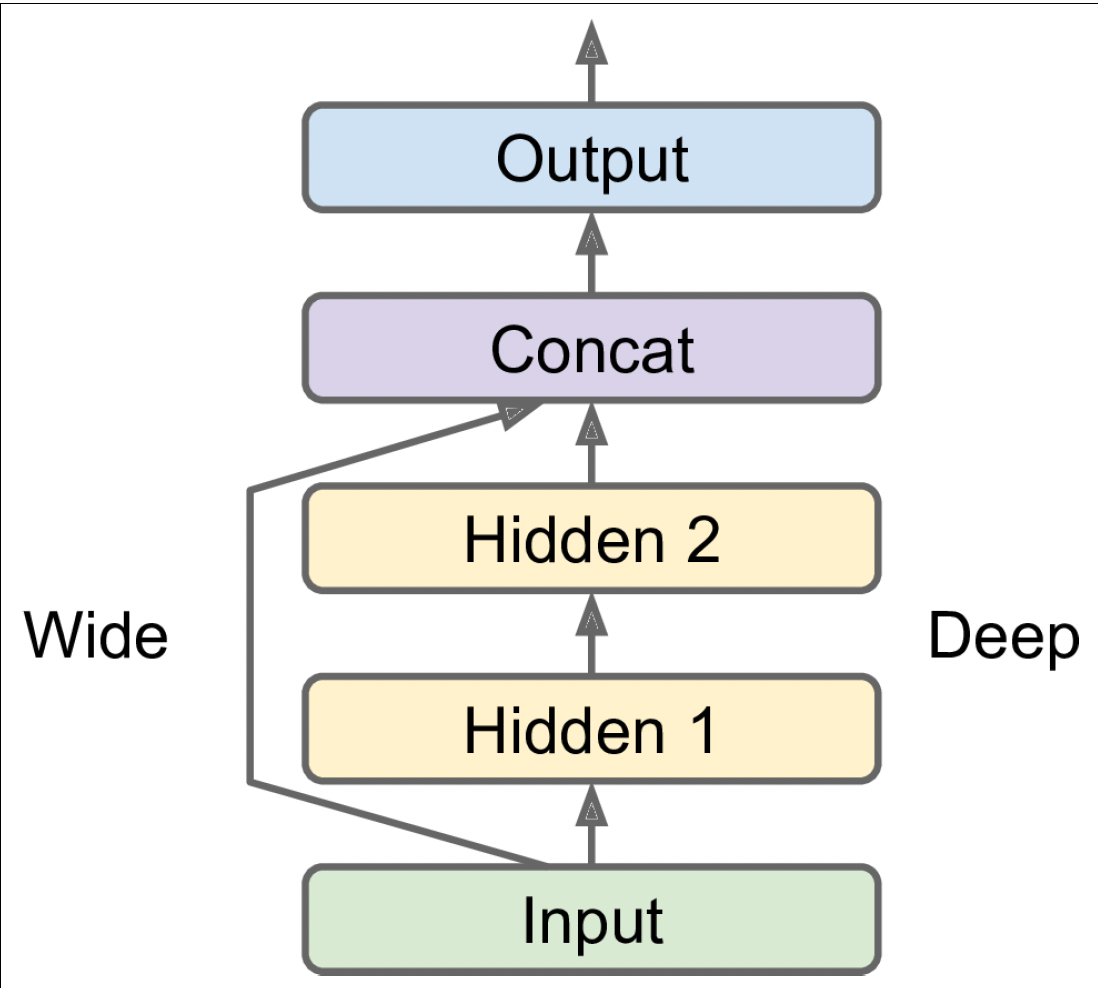

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

- Es necesario crear el objeto ``Input``. Esta es una especificación del tipo de modelo que se obtendrá, incluyendo su shape y dtype. Un modelo podría tener múltiples entradas.
- A seguir, se crea una capa Densa con 30 unidade, usando ReLU como activación. Al momento de ser creado se llama como una función, pasándole la entrada. Por esto es llamado de Functional API. Solo estamos indicando como deben ser conectados, aún no hay procesamiento.
- Se crea una segunda capa oculta, otra vez se usa como una función. Se pasa la salida de la primera capa oculta.
- A seguir se crea una capa ``Concatenate``, la cual se usa como función para concatenar la entrada y la salida de la segunda capa oculta.
- Finalmente se crea el ``Model``, especificando cuales entradas y salidas usar.

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 30)                   270       ['input_2[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 30)                   930       ['dense_7[0][0]']             
                                                                                                  
 concatenate_1 (Concatenate  (None, 38)                   0         ['input_2[0][0]',             
 )                                                                   'dense_8[0][0]']       

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.2348 - val_loss: 1.0153
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6841 - val_loss: 0.6564
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6277 - val_loss: 0.6060
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5950 - val_loss: 0.6383
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5702 - val_loss: 0.6053
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5486 - val_loss: 0.5374
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5314 - val_loss: 0.5053
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5169 - val_loss: 0.5525
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5029 - val_loss: 0.4840
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4916 - val_loss: 0.4641

**Múltiples entradas**

¿Qué sucede si se desea enviar diferentes subconjuntos de funciones de entrada a través de rutas amplias o profundas? Enviaremos 5 variables por el camino amplio (características 0 a 4) y 6 a través del camino profundo (características 2 a 7). Tenga en cuenta que 3 características pasarán por ambas ( 2, 3 y 4).


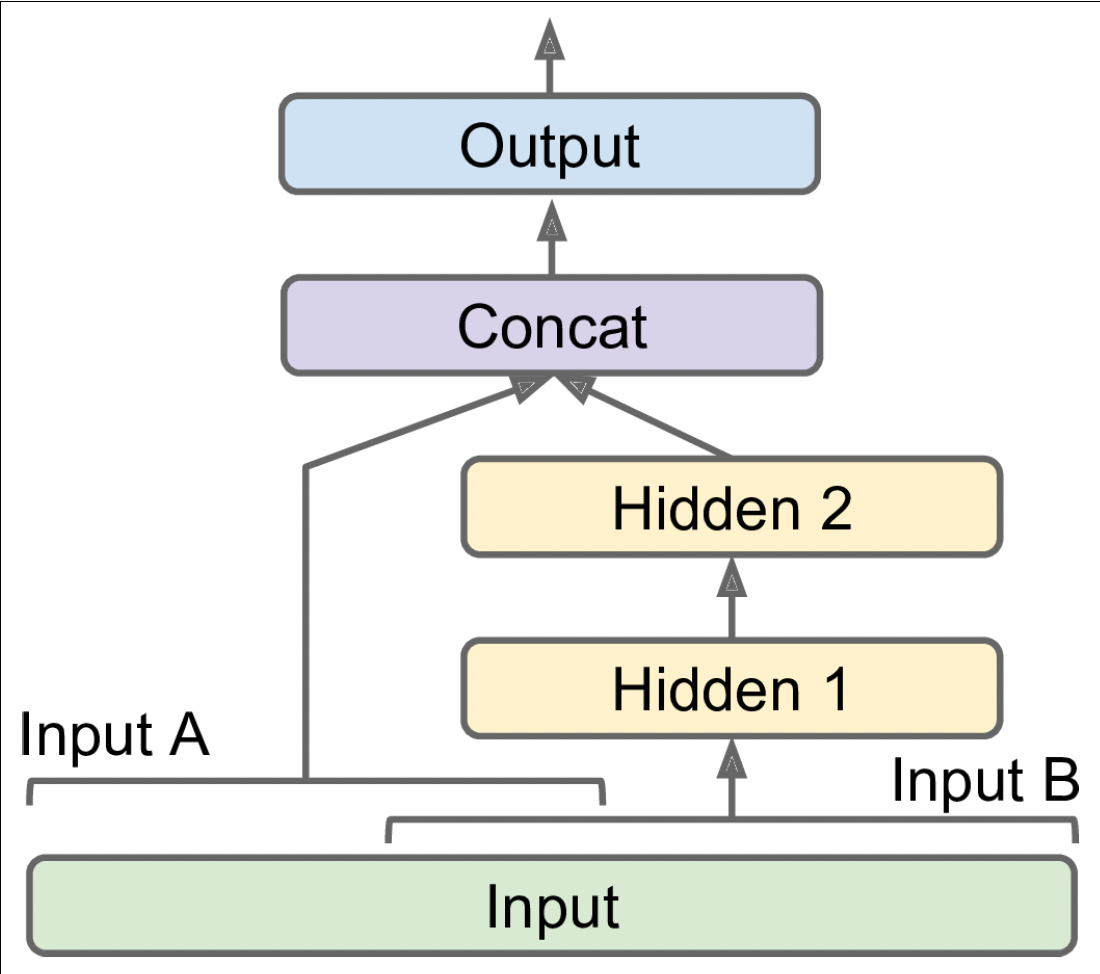

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

- Note que se han especificado ``inputs = [input_A, input_B]`` al crear el modelo.
- Al momento de llamar a ``fit()``, se debe pasar un par de matrices``(X_train_A, X_train_B)``, lo mismo debe hacerse con ``evaluate``
 y ``predict``.

In [ ]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 2.0402 - val_loss: 1.0414
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7520 - val_loss: 0.6781
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6687 - val_loss: 0.6157
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6239 - val_loss: 0.5964
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.5893 - val_loss: 0.5396
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5568 - val_loss: 0.5073
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5315 - val_loss: 0.4826
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5095 - val_loss: 0.4930
Epoch 9/20
363/363 [==============================] - 4s 11ms/step - loss: 0.4905 - val_loss: 0.4443
Epoch 10/20
363/363 [==============================] - 5s 13ms/step - loss: 0.4770 - val_loss: 0.43

In [ ]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.4256


In [ ]:
mse_test

In [ ]:
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 61ms/step


**Usos para múltiples salidas**

- La tarea puede demandarla: por ejemplo localizar y clasificar el objeto principal en una figura. La localización es regresión y la segunda tarea es clasificación.
- Multitask classification: en figuras de imágenes, una salida para clasificar la expresión facial (sonriso, sorpresa, etc.) y la otra salida para identificar si se está usando lentes o no.
- Regularización: se puede añadir salidas auxiliares en redes neuronales para garantizar que la parte principal de la red aprende algo útil por si sola, sin depender del resto de la red.

Agregar una salida auxiliar para la regularización:



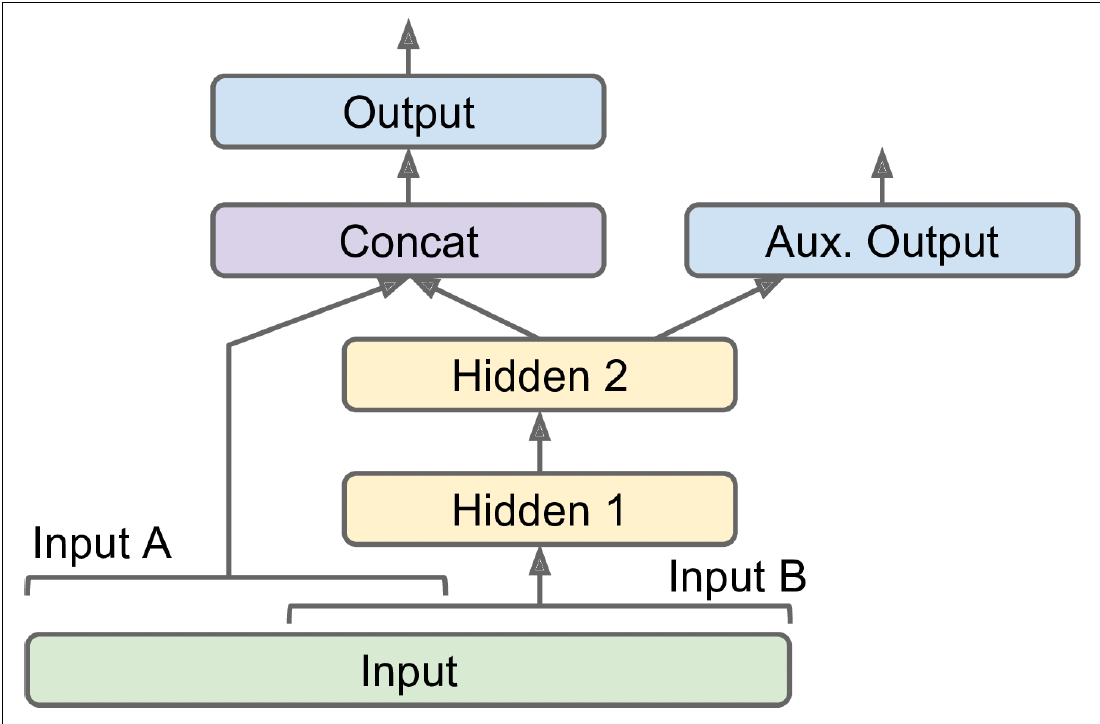

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

Cada salida necesitará su propia función de ``loss``. Nos importa más la salida principal que la auxiliar (para regularizar), por eso se le da mayor peso al loss principal (0.9).

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.9399 - main_output_loss: 2.6187 - aux_output_loss: 5.8307 - val_loss: 3.5512 - val_main_output_loss: 3.4452 - val_aux_output_loss: 4.5060
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 1.0635 - main_output_loss: 0.7683 - aux_output_loss: 3.7199 - val_loss: 1.2186 - val_main_output_loss: 0.9915 - val_aux_output_loss: 3.2628
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.8383 - main_output_loss: 0.6571 - aux_output_loss: 2.4693 - val_loss: 0.8992 - val_main_output_loss: 0.6047 - val_aux_output_loss: 3.5494
Epoch 4/20
363/363 [==============================] - 2s 7ms/step - loss: 0.7361 - main_output_loss: 0.6150 - aux_output_loss: 1.8253 - val_loss: 0.9412 - val_main_output_loss: 0.5769 - val_aux_output_loss: 4.2201
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6785 - main_output_loss: 0.5867 - aux_output_loss: 1.5050 - val_loss

En este ejemplo, la salida principal y la auxiliar deben intentar predecir los mismo, por eso deben usar las mismas etiquetas. Por eso se pasa ``(y_train, y_train)``, lo mismo pasa con la validación y la prueba.

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 114ms/step


##**Subclase de API para modelos dinámicos**

- Los modelos anteriores son declarativos, se compilan y despues recien reciben datos. Se puede hacer detectar errores antes de usarlos, verificar tipos. Estos modelos son estáticos por naturaleza.
- Existen modelos que envuelven loops, varian sus dimensiones, tienen profundidades condicionales y tienen comportamientos dinámicos.
- Para estos casos dinámicos se debe usar la API de subclases.

Funcionamiento:

- Se crea una subclase de ``Model``
- En el constructor de la clase se definen las capas (y parámetros).
- Para las transformaciones se utiliza el método ``call``.

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

- Ventajas: en el método ``call()``, se puede hacer lo que se desee, introducir for loops, if statements, operaciones de bajo nivel, se puede experimentar nuevas ideas.

- Desventajas: no se puede serializar muy bien, no se puede inspeccionar los valores

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 5s 12ms/step - loss: 2.0695 - output_1_loss: 1.7324 - output_2_loss: 5.1031 - val_loss: 1.1512 - val_output_1_loss: 0.8581 - val_output_2_loss: 3.7890
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 1.0249 - output_1_loss: 0.7929 - output_2_loss: 3.1133 - val_loss: 0.9042 - val_output_1_loss: 0.7250 - val_output_2_loss: 2.5171
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.8604 - output_1_loss: 0.7104 - output_2_loss: 2.2095 - val_loss: 0.8380 - val_output_1_loss: 0.6791 - val_output_2_loss: 2.2683
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7747 - output_1_loss: 0.6620 - output_2_loss: 1.7887 - val_loss: 0.7838 - val_output_1_loss: 0.6259 - val_output_2_loss: 2.2052
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7222 - output_1_loss: 0.6269 - output_2_loss: 1.5791 - val_loss: 0.7412 - val_output_1_loss: 0.5956 - val_o

## **Guardar modelos y cargar**

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3052 - val_loss: 1.0196
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8649 - val_loss: 0.8281
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7147 - val_loss: 0.7787
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6489 - val_loss: 0.6254
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6032 - val_loss: 0.5696
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5667 - val_loss: 0.5641
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5384 - val_loss: 0.5764
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5154 - val_loss: 0.4818
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4953 - val_loss: 0.4787
Epoch 10/10
162/162 [==============================] - 0s 3ms/step - loss: 0.4662


In [ ]:
model.save("mi_modelo_keras.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = keras.models.load_model("mi_modelo_keras.h5")

In [ ]:
model.predict(X_new)

1/1 [==============================] - 0s 114ms/step


array([[0.919675 ],
       [1.3925369],
       [3.0079958]], dtype=float32)

Guardar pesos

In [ ]:
#model.save_weights("mis_pesos_keras.ckpt")

In [ ]:
#model.load_weights("mis_pesos_keras.ckpt")

##**Uso de Callbacks**

- El método ``fit()`` acepta como argument ``callbacks``, que permite especificar una lista de objetos que se llamarán al principio y al fin del entrenamiento, o de cada época, o al procesar cada batch.
- Por ejemplo: el callback ``ModelCheckpoint`` guarda puntos de control del modelo a intervalos regulares durante el entrenamiento, al fin de cada época, para evitar que se pierda información por fallas en hardware.  


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

Callback que guarda los modelos a cada época, guarda el mejor modelo

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo_keras.h5", save_best_only=True)

Si se usa un conjunto de validación en el entrenamiento, se puede usar ``save_best_only = True`` al crear el ModelCheckpoint. Solo se salvará el modelo cuando su performance en el conjunto de validación sea el mejor hasta ahora.

En ese sentido, no se debe preocupar si el entrenamiento es muy largo y provoca overfitting en algún momento, simplemente se restaura el modelo guardado después del entrebamiento, este será el mejor modelo en el conjunto de validación.

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("mi_modelo_keras.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.0491 - val_loss: 1.0234
Epoch 2/10
 99/363 [=======>......................] - ETA: 0s - loss: 0.8586

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 2ms/step - loss: 0.8016 - val_loss: 0.7033
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7021 - val_loss: 0.6895
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6531 - val_loss: 0.6283
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6182 - val_loss: 0.6049
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5862 - val_loss: 0.5871
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5597 - val_loss: 0.6058
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5352 - val_loss: 0.5322
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5121 - val_loss: 0.5008
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5004


**Callback para Early Stopping**

- ``EarlyStopping`` interrumpirá el entrenamiento cuando no hay más progreso en el conjunto de validación por un número de épocas (argumente ``patience``).
- Opcionalmente hará un rollback al mejor modelo.
- Se pueden combinar ambos callbacks para guardar checkpoints e interrumpir cuando no hay progreso:

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True) # ya no es necesario cargar el mejor modelo


In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.4923 - val_loss: 0.4745
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4754 - val_loss: 0.4583
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4613 - val_loss: 0.4319
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4473 - val_loss: 0.4190
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4378 - val_loss: 0.4035
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4279 - val_loss: 0.4059
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4215 - val_loss: 0.3918
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4153 - val_loss: 0.3851
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4101 - val_loss: 0.3935
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_lo

Callback custom:
Se puede definir funciones personalizadas.

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"])) # imprimer el ratio de loss validación y el loss de entrenamiento.

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

339/363 [===========================>..] - ETA: 0s - loss: 0.3415
val/train: 0.99
363/363 [==============================] - 1s 2ms/step - loss: 0.3433 - val_loss: 0.3400
